<a href="https://colab.research.google.com/github/modwedar/machine-learning-regression/blob/main/simple_linear_regression2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Simple Linear Regression

#Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Reading the data in

In [3]:
dataset = pd.read_csv('FuelConsumptionCo2.csv')
dataset.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


#Data Exploration

In [4]:
# summarize the data
dataset.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [6]:
cdf = dataset[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267


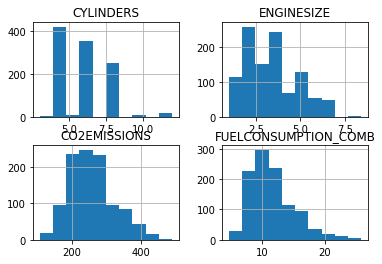

In [7]:
viz = cdf[['CYLINDERS','ENGINESIZE','CO2EMISSIONS','FUELCONSUMPTION_COMB']]
viz.hist()
plt.show()

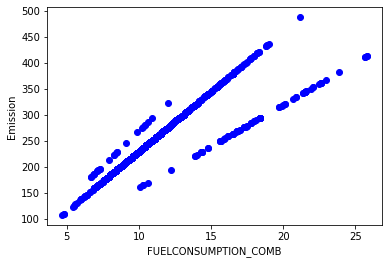

In [8]:
plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("Emission")
plt.show()

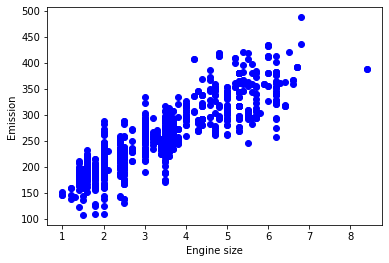

In [9]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

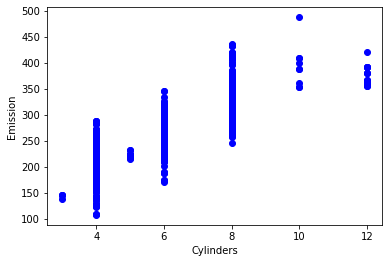

In [11]:
plt.scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("Cylinders")
plt.ylabel("Emission")
plt.show()

In [14]:
X = cdf[['ENGINESIZE']].values
y = cdf[['CO2EMISSIONS']].values
X

array([[2. ],
       [2.4],
       [1.5],
       ...,
       [3. ],
       [3.2],
       [3.2]])

##Splitting the dataset into the Training set and Test set

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

##Training the Simple Linear Regression model on the Training set

In [16]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [18]:
y_pred = regressor.predict(X_test)
# The coefficients
print ('Coefficients: ', regressor.coef_)
print ('Intercept: ',regressor.intercept_)

Coefficients:  [[39.24838431]]
Intercept:  [126.18920155]


##Visualising the Training set results

<function matplotlib.pyplot.show(close=None, block=None)>

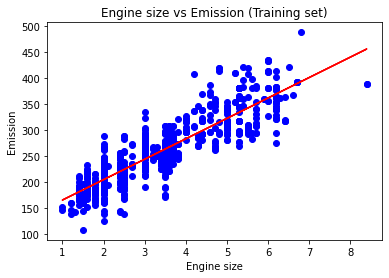

In [25]:
plt.scatter(X_train, y_train, color='blue')
plt.plot(X_train, regressor.predict(X_train), '-r')
## Or
##plt.plot(X_train, regressor.coef_[0][0]*X_train + regressor.intercept_[0], '-r')

plt.title('Engine size vs Emission (Training set)')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show

#Visualising the Test set results

<function matplotlib.pyplot.show(close=None, block=None)>

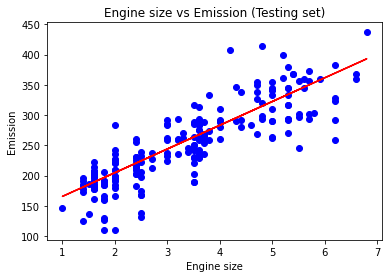

In [26]:
plt.scatter(X_test, y_test, color='blue')
plt.plot(X_test, y_pred, '-r')
plt.title('Engine size vs Emission (Testing set)')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show

##Evaluation

In [27]:
from sklearn.metrics import r2_score

print("Mean absolute error: %.2f" % np.mean(np.absolute(y_pred - y_test)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_pred - y_test) ** 2))
print("R2-score: %.2f" % r2_score(y_test , y_pred) )

Mean absolute error: 25.57
Residual sum of squares (MSE): 1181.53
R2-score: 0.72


##Using FUELCONSUMPTION_COMB Feature

In [29]:
from sklearn.model_selection import train_test_split

X = cdf[['FUELCONSUMPTION_COMB']].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
regressor.fit(X_train, y_train)

LinearRegression()

In [33]:
# The coefficients
print ('Coefficients: ', regressor.coef_)
print ('Intercept: ',regressor.intercept_)

Coefficients:  [[15.93412876]]
Intercept:  [71.84055175]


[[15.93412876]]


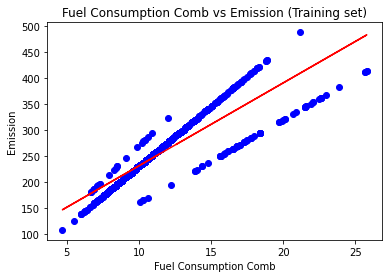

In [32]:
plt.scatter(X_train, y_train, color='blue')
plt.plot(X_train, regressor.predict(X_train), '-r')

plt.title('Fuel Consumption Comb vs Emission (Training set)')
plt.xlabel("Fuel Consumption Comb")
plt.ylabel("Emission")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

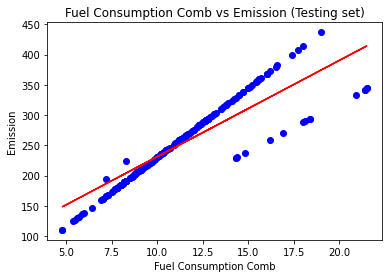

In [34]:
plt.scatter(X_test, y_test, color='blue')
plt.plot(X_test, regressor.predict(X_test), '-r')

plt.title('Fuel Consumption Comb vs Emission (Testing set)')
plt.xlabel("Fuel Consumption Comb")
plt.ylabel("Emission")
plt.show

In [36]:
from sklearn.metrics import r2_score

y_pred = regressor.predict(X_test)

#evaluation
print("Mean absolute error: %.2f" % np.mean(np.absolute(y_pred - y_test)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_pred - y_test) ** 2))
print("R2-score: %.2f" % r2_score(y_test , y_pred) )

Mean absolute error: 20.34
Residual sum of squares (MSE): 746.32
R2-score: 0.82
